In [37]:
#Import packages
import geopandas as gpd
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import math
from shapely.affinity import translate
from shapely.geometry import Polygon

In [38]:
#Load shapefile
TestPoints = gpd.read_file('Shapefiles/CapeEgmont_TEST_intersect3.shp')

#View shapefile table
TestPoints

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,Code,geometry
0,694,177,177,1,19/09/1955,11.059271,1.664816e+06,5.652014e+06,3.206634,5,POINT (1664816.274 5652014.454)
1,695,177,177,1,08/11/1970,9.226497,1.664818e+06,5.652014e+06,3.470649,5,POINT (1664818.097 5652014.267)
2,696,177,177,1,11/02/2017,6.706946,1.664821e+06,5.652014e+06,2.091626,5,POINT (1664820.603 5652014.011)
3,697,177,177,1,05/12/2020,5.195157,1.664822e+06,5.652014e+06,2.400562,5,POINT (1664822.107 5652013.857)
4,698,178,178,1,19/09/1955,10.972691,1.664816e+06,5.652004e+06,3.206634,5,POINT (1664815.895 5652003.931)
5,699,178,178,1,08/11/1970,9.455830,1.664817e+06,5.652004e+06,3.470649,5,POINT (1664817.410 5652003.850)
6,700,178,178,1,11/02/2017,7.331568,1.664820e+06,5.652004e+06,2.091626,5,POINT (1664819.531 5652003.737)
7,701,178,178,1,05/12/2020,6.193758,1.664821e+06,5.652004e+06,2.400562,5,POINT (1664820.667 5652003.677)
8,702,179,179,1,19/09/1955,11.292251,1.664815e+06,5.651993e+06,3.206634,4,POINT (1664815.329 5651993.202)
9,703,179,179,1,08/11/1970,9.789220,1.664817e+06,5.651993e+06,3.470649,4,POINT (1664816.831 5651993.222)


In [39]:
#Adding a new column with 1950 as the base date for all
TestPoints['BaseDate']= '1/1/1950'
TestPoints['BaseDate']=pd.to_datetime(TestPoints['BaseDate'])

#Adding new column and converts to datetime
TestPoints['Date']=pd.to_datetime(TestPoints['ShorelineI'])

# Finding the number of days between base date 1950 and the respective row date
TestPoints['ElapsedTime']=TestPoints.Date - TestPoints.BaseDate

#Adding another row with Date in 2100
TestPoints['to2100']='1/1/2100'

#Convert to datetime
TestPoints['to2100']=pd.to_datetime(TestPoints['to2100'])

#Finding number of days to 2100
TestPoints['Future'] = TestPoints.to2100 - TestPoints.Date

C:\Users\lalit\AppData\Local\Temp\ipykernel_14412\1209900260.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  TestPoints['Date']=pd.to_datetime(TestPoints['ShorelineI'])


In [40]:
#View top of shaefile table
TestPoints.head(8)

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,Code,geometry,BaseDate,Date,ElapsedTime,to2100,Future
0,694,177,177,1,19/09/1955,11.059271,1.664816e+06,5.652014e+06,3.206634,5,POINT (1664816.274 5652014.454),1950-01-01,1955-09-19,2087 days,2100-01-01,52700 days
1,695,177,177,1,08/11/1970,9.226497,1.664818e+06,5.652014e+06,3.470649,5,POINT (1664818.097 5652014.267),1950-01-01,1970-11-08,7616 days,2100-01-01,47171 days
2,696,177,177,1,11/02/2017,6.706946,1.664821e+06,5.652014e+06,2.091626,5,POINT (1664820.603 5652014.011),1950-01-01,2017-02-11,24513 days,2100-01-01,30274 days
3,697,177,177,1,05/12/2020,5.195157,1.664822e+06,5.652014e+06,2.400562,5,POINT (1664822.107 5652013.857),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days
4,698,178,178,1,19/09/1955,10.972691,1.664816e+06,5.652004e+06,3.206634,5,POINT (1664815.895 5652003.931),1950-01-01,1955-09-19,2087 days,2100-01-01,52700 days
5,699,178,178,1,08/11/1970,9.455830,1.664817e+06,5.652004e+06,3.470649,5,POINT (1664817.410 5652003.850),1950-01-01,1970-11-08,7616 days,2100-01-01,47171 days
6,700,178,178,1,11/02/2017,7.331568,1.664820e+06,5.652004e+06,2.091626,5,POINT (1664819.531 5652003.737),1950-01-01,2017-02-11,24513 days,2100-01-01,30274 days
7,701,178,178,1,05/12/2020,6.193758,1.664821e+06,5.652004e+06,2.400562,5,POINT (1664820.667 5652003.677),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days


In [41]:
# New DataFrame with only latest X/Y coordinates for TestPoints
TestPoints_latest = TestPoints.sort_values('Date', ascending = False)
TestPoints_latest = TestPoints_latest.drop_duplicates('TransectID')

TestPoints_latest

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,Code,geometry,BaseDate,Date,ElapsedTime,to2100,Future
31,725,184,184,1,05/12/2020,5.707005,1.664828e+06,5.651943e+06,2.400562,5,POINT (1664828.193 5651942.820),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days
11,705,179,179,1,05/12/2020,6.634716,1.664820e+06,5.651993e+06,2.400562,4,POINT (1664819.986 5651993.264),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days
23,717,182,182,1,05/12/2020,3.518093,1.664826e+06,5.651963e+06,2.400562,5,POINT (1664826.112 5651963.004),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days
3,697,177,177,1,05/12/2020,5.195157,1.664822e+06,5.652014e+06,2.400562,5,POINT (1664822.107 5652013.857),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days
27,721,183,183,1,05/12/2020,8.409710,1.664823e+06,5.651952e+06,2.400562,3,POINT (1664823.000 5651952.005),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days
19,713,181,181,1,05/12/2020,2.101144,1.664826e+06,5.651973e+06,2.400562,5,POINT (1664825.921 5651973.238),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days
7,701,178,178,1,05/12/2020,6.193758,1.664821e+06,5.652004e+06,2.400562,5,POINT (1664820.667 5652003.677),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days
15,709,180,180,1,05/12/2020,5.050046,1.664821e+06,5.651983e+06,2.400562,5,POINT (1664821.398 5651983.013),1950-01-01,2020-12-05,25906 days,2100-01-01,28881 days


In [42]:
# To view what format each variable is in and converting ElapsedTime to seconds
TestPoints['ElapsedTimeSeconds'] = TestPoints['ElapsedTime'].dt.total_seconds().astype(float)

print(TestPoints.dtypes)

OBJECTID                        int64
TransectID                      int64
TransOrder                      int64
BaselineID                      int64
ShorelineI                     object
Distance                      float64
IntersectX                    float64
IntersectY                    float64
Uncertaint                    float64
Code                            int64
geometry                     geometry
BaseDate               datetime64[ns]
Date                   datetime64[ns]
ElapsedTime           timedelta64[ns]
to2100                 datetime64[ns]
Future                timedelta64[ns]
ElapsedTimeSeconds            float64
dtype: object


In [43]:
# Example data (replace this with your actual data)
dates = pd.to_datetime(TestPoints['Date'])  # Replace with your date values
distances = np.array(TestPoints['Distance'])  # Replace with your distance values

# Convert datetime to numerical values (days since a reference date)
reference_date = pd.to_datetime('1950-01-01')
numerical_dates = (dates - reference_date).dt.days/365.25

print (numerical_dates)

0      5.713895
1     20.851472
2     67.112936
3     70.926762
4      5.713895
5     20.851472
6     67.112936
7     70.926762
8      5.713895
9     20.851472
10    67.112936
11    70.926762
12     5.713895
13    20.851472
14    67.112936
15    70.926762
16     5.713895
17    20.851472
18    67.112936
19    70.926762
20     5.713895
21    20.851472
22    67.112936
23    70.926762
24     5.713895
25    20.851472
26    67.112936
27    70.926762
28     5.713895
29    20.851472
30    67.112936
31    70.926762
Name: Date, dtype: float64


In [44]:
# Example data (replace this with your actual data)
dates = pd.to_datetime(TestPoints['Date'])  # Replace with your date values
distances = np.array(TestPoints['Distance'])  # Replace with your distance values

# Convert datetime to numerical values (days since a reference date)
reference_date = pd.to_datetime('1950-01-01')
numerical_dates = (dates - reference_date).dt.days/365.25

# Group data by Transect ID
grouped = TestPoints.groupby('TransectID')

# Perform linear regression for each group
results = []
for group_name, group_data in grouped:
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days/365.25
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    #Sunamara relationship inputs  
    Historic_SLR = 0.002
    Proj_SLR = 0.01
    Length_AP = 82.1
    C_Depth = 9.577
    
    #Bray and Hooke relationship
    X = C_Depth/(slope + Length_AP)
    Y = (Proj_SLR - Historic_SLR)/X
    Proj_RR = slope + Y
    
    # Calculate the predicted distance for the target date (2100-01-01)
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days/365.25
    predicted_distance_target = (Proj_RR * numerical_target_date + intercept)

    results.append({
        'TransectID': group_name,
        'Historic reccession rate = Slope': slope,
        'Intercept': intercept,
        'X': X,
        'Y': Y,
        'Proj_RR': Proj_RR,
        'PredictedDistance': predicted_distance_target
        
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

   TransectID  Historic reccession rate = Slope  Intercept         X  \
0         177                         -0.077558  11.238595  0.116761   
1         178                         -0.063817  11.114625  0.116741   
2         179                         -0.068713  11.485155  0.116748   
3         180                         -0.053183   9.314258  0.116726   
4         181                         -0.081253   8.364648  0.116766   
5         182                         -0.033888   7.043973  0.116699   
6         183                          0.003714   8.341717  0.116645   
7         184                         -0.065651  11.387320  0.116744   

          Y   Proj_RR  PredictedDistance  
0  0.068516 -0.009042           9.882273  
1  0.068528  0.004710          11.821171  
2  0.068524 -0.000190          11.456670  
3  0.068537  0.015354          11.617279  
4  0.068513 -0.012740           6.453686  
5  0.068553  0.034664          12.243565  
6  0.068584  0.072298          19.186270  
7  0.06

Transect 177 - Distance difference: 5.932235644997311
Transect 178 - Distance difference: 4.957624045891272
Transect 179 - Distance difference: 5.304892610159033
Transect 180 - Distance difference: 4.203361681618917
Transect 181 - Distance difference: 6.194278110933206
Transect 182 - Distance difference: 2.8348631069681387
Transect 183 - Distance difference: 0.16787458013302192
Transect 184 - Distance difference: 5.087680267082139


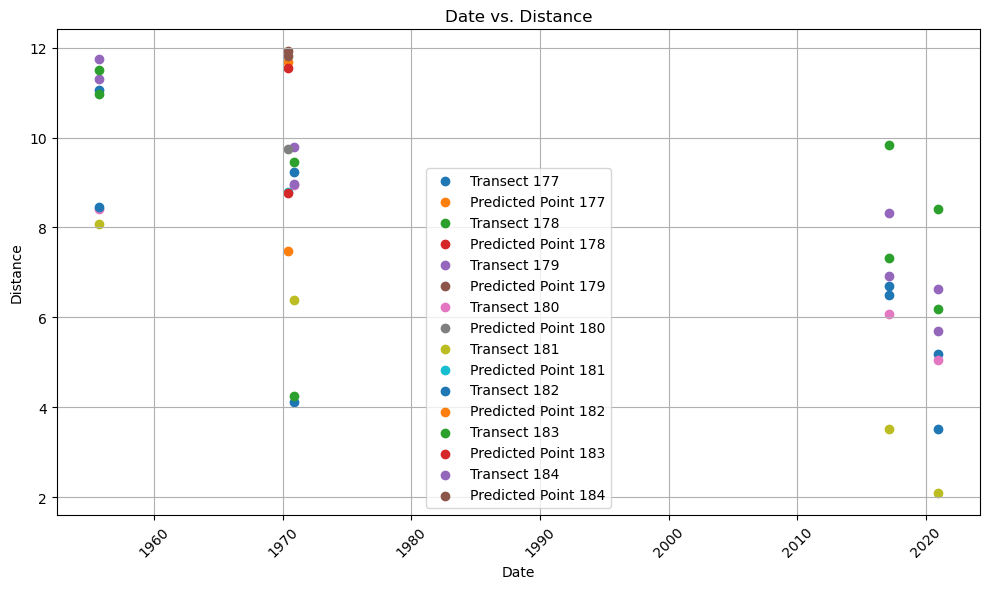

In [45]:
# Calculate the absolute difference between the predicted distances and the old distances for each Transect ID
plt.figure(figsize=(10, 6))

distance_lookup = {}

for group_name, group_data in grouped:
    
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days/365.25
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    # Calculate the predicted distance for the last old data point's date
    last_old_date = group_data['Date'].max()
    numerical_last_old_date = (last_old_date - reference_date).days/365.25
    predicted_distance_last_old = slope * numerical_last_old_date + intercept

    # Calculate the predicted distance for the target date
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days/365.25
    predicted_distance_target = (Proj_RR * numerical_target_date + intercept)

    # Calculate the absolute difference between the predicted distances
    distance_difference = abs(predicted_distance_last_old - predicted_distance_target)
    distance_lookup[group_name] = distance_difference

    plt.scatter(group_data['Date'], group_data['Distance'], label=f'Transect {group_name}')
    plt.scatter(numerical_target_date, predicted_distance_target, label=f'Predicted Point {group_name}')

    print(f"Transect {group_name} - Distance difference: {distance_difference}")

plt.xlabel('Date')
plt.ylabel('Distance')
plt.title('Date vs. Distance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [46]:
print(group_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4 entries, 28 to 31
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   OBJECTID            4 non-null      int64          
 1   TransectID          4 non-null      int64          
 2   TransOrder          4 non-null      int64          
 3   BaselineID          4 non-null      int64          
 4   ShorelineI          4 non-null      object         
 5   Distance            4 non-null      float64        
 6   IntersectX          4 non-null      float64        
 7   IntersectY          4 non-null      float64        
 8   Uncertaint          4 non-null      float64        
 9   Code                4 non-null      int64          
 10  geometry            4 non-null      geometry       
 11  BaseDate            4 non-null      datetime64[ns] 
 12  Date                4 non-null      datetime64[ns] 
 13  ElapsedTime         4 non-null    

In [47]:
distance_lookup

{177: 5.932235644997311,
 178: 4.957624045891272,
 179: 5.304892610159033,
 180: 4.203361681618917,
 181: 6.194278110933206,
 182: 2.8348631069681387,
 183: 0.16787458013302192,
 184: 5.087680267082139}

In [48]:
# Replace 'path_to_shapefile' with the actual path to your shapefile
shapefile_path = 'Shapefiles/CapeEgmont_TEST_Line3.shp'
TransectLine = gpd.read_file(shapefile_path)

#Line shapefiles have azimuth 
TransectLine

,OBJECTID,TransectID,BaselineID,GroupID,TransOrder,Azimuth,ShrCount,TCD,SHAPE_Leng,SCE,...,EPRunc,LRR,LR2,LSE,LCI95_5,WLR,WR2,WSE,WCI95_5,geometry
0,175,177,1,0,177,95.85,4,1790.0,11.059271,5.86,...,0.06,-0.08,0.95,0.70,0.06,-0.08,0.93,0.29,0.07,"LINESTRING (1664816.274 5652014.454, 1664827.2..."
1,176,178,1,0,178,93.04,4,1800.0,10.972667,4.78,...,0.06,-0.06,0.96,0.53,0.04,-0.06,0.94,0.22,0.05,"LINESTRING (1664815.895 5652003.931, 1664826.8..."
2,177,179,1,0,179,89.24,4,1810.0,11.292227,4.66,...,0.06,-0.07,0.99,0.24,0.02,-0.07,0.99,0.07,0.02,"LINESTRING (1664815.329 5651993.202, 1664826.6..."
3,178,180,1,0,180,86.09,4,1820.0,8.953527,3.90,...,0.06,-0.05,0.88,0.80,0.06,-0.05,0.88,0.27,0.06,"LINESTRING (1664817.504 5651982.747, 1664826.4..."
4,179,181,1,0,181,83.36,4,1830.0,8.084091,5.98,...,0.06,-0.08,0.97,0.60,0.05,-0.08,0.95,0.26,0.06,"LINESTRING (1664819.978 5651972.546, 1664828.0..."
5,180,182,1,0,182,80.16,4,1840.0,8.452946,4.93,...,0.06,-0.03,0.24,2.43,0.19,-0.03,0.21,0.87,0.20,"LINESTRING (1664821.250 5651962.160, 1664829.5..."
6,181,183,1,0,183,78.05,4,1850.0,11.498425,7.26,...,0.06,0.00,0.00,3.80,0.30,0.00,0.00,1.16,0.26,"LINESTRING (1664819.978 5651951.366, 1664831.2..."
7,182,184,1,0,184,77.32,4,1860.0,11.739553,6.03,...,0.06,-0.07,0.76,1.50,0.12,-0.06,0.70,0.60,0.14,"LINESTRING (1664822.308 5651941.495, 1664833.7..."


In [49]:
def calculate_new_coordinates(old_x, old_y, bearing, distance):
    bearing_radians = math.radians(bearing)
    new_x = old_x + (distance * math.sin(bearing_radians))
    new_y = old_y + (distance * math.cos(bearing_radians))
    return new_x, new_y

# Calculate New X/Y coordinates for each Transect
new_TransectLine = TransectLine[['TransectID', 'Azimuth']]
new_TransectLine = new_TransectLine.merge(TestPoints_latest[['TransectID', 'IntersectX', 'IntersectY']], on = 'TransectID')

new_TransectLine[['NewX', 'NewY']] = new_TransectLine.apply(lambda row: calculate_new_coordinates(row['IntersectX'],
                                                                                                 row['IntersectY'],
                                                                                                 row['Azimuth'],
                                                                                                 distance_lookup[row.TransectID]),
                                                           axis = 1,
                                                           result_type = 'expand')

new_TransectLine = new_TransectLine.sort_values('TransectID', ascending = True)
new_TransectLine

,TransectID,Azimuth,IntersectX,IntersectY,NewX,NewY
0,177,95.85,1.664822e+06,5.652014e+06,1.664828e+06,5.652013e+06
1,178,93.04,1.664821e+06,5.652004e+06,1.664826e+06,5.652003e+06
2,179,89.24,1.664820e+06,5.651993e+06,1.664825e+06,5.651993e+06
3,180,86.09,1.664821e+06,5.651983e+06,1.664826e+06,5.651983e+06
4,181,83.36,1.664826e+06,5.651973e+06,1.664832e+06,5.651974e+06
5,182,80.16,1.664826e+06,5.651963e+06,1.664829e+06,5.651963e+06
6,183,78.05,1.664823e+06,5.651952e+06,1.664823e+06,5.651952e+06
7,184,77.32,1.664828e+06,5.651943e+06,1.664833e+06,5.651944e+06


<Axes: >

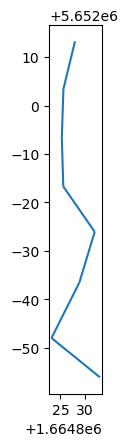

In [50]:
# Convert Dataframe to geodataframe
new_TransectLine = gpd.GeoDataFrame(new_TransectLine, geometry = gpd.points_from_xy(new_TransectLine.NewX, 
                                                                       new_TransectLine.NewY),
                                    crs = 'EPSG:2193').rename(columns = {'geometry': 'from_point'})
# Get from and to points
new_TransectLine['to_point'] = new_TransectLine.from_point.shift(-1)
new_TransectLine.loc[new_TransectLine["to_point"].isna(), "to_point"] = new_TransectLine["from_point"]

# Get Line geometry between points
new_TransectLine['geometry'] = new_TransectLine.apply(lambda row: LineString([row['from_point'], row['to_point']]),
                                                 axis = 1)
new_TransectLine.plot()

<Axes: >

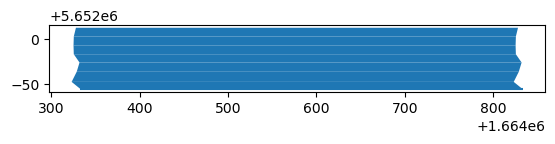

In [51]:
#Add code to nake line into polygon extending 500m out to the left
def extend(line):
  return line.union(translate(line, xoff=-500)).convex_hull

Shoreline_polygon = new_TransectLine.geometry.apply(extend)

Shoreline_polygon.plot()

In [52]:
# Assuming Shoreline_polygon is a GeoSeries containing your geometries
# If it's a GeoDataFrame, you can use gdf = Shoreline_polygon instead
Shoreline_polygon = gpd.GeoSeries(Shoreline_polygon)

# Filter out LINESTRING geometries from the GeoSeries
filtered_geometries = Shoreline_polygon[Shoreline_polygon.type == 'Polygon']

# Define the path where you want to save the shapefile
output_shapefile = "C:/Users/lalit/GitHub/Shoreline_Projections/Projected_Shoreline_Polygons/AOIname_Sunamura.shp"

# Create a GeoDataFrame from the filtered POLYGON geometries
gdf = gpd.GeoDataFrame(geometry=filtered_geometries)

# Save the GeoDataFrame as a shapefile
gdf.to_file(output_shapefile)

# Verify that the shapefile has been created successfully
print(f"Shapefile saved to {output_shapefile}")

Shapefile saved to C:/Users/lalit/GitHub/Shoreline_Projections/Projected_Shoreline_Polygons/AOIname_Sunamura.shp
